In [165]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [166]:
import os.path
import csv

fileNameArray = []

base_dir = os.path.join('velo') # alles zit in map 'velo'
# input_path_jan_14 = os.path.join('', 'bike-usage-2014-01.csv')
# input_path_apr_14 = os.path.join('', 'bike-usage-2014-04.csv') #bv velo/bike-usage-2014-04.csv
# input_path_jul_14 = os.path.join('', 'bike-usage-2014-07.csv')
# input_path_oct_14 = os.path.join('', 'bike-usage-2014-10.csv')
# input_path_jan_15 = os.path.join('', 'bike-usage-2015-01.csv')
# input_path_feb_15 = os.path.join('', 'bike-usage-2015-02.csv')
# input_path_mar_15 = os.path.join('', 'bike-usage-2015-03.csv')
# input_path_apr_15 = os.path.join('', 'bike-usage-2015-04.csv')
# input_path_may_15 = os.path.join('', 'bike-usage-2015-05.csv') #mei 2015
# input_path_jun_15 = os.path.join('', 'bike-usage-2015-06.csv')
# input_path_jul_15 = os.path.join('', 'bike-usage-2015-07.csv')
# input_path_aug_15 = os.path.join('', 'bike-usage-2015-08.csv')
# input_path_sep_15 = os.path.join('', 'bike-usage-2015-09.csv')
input_path_velo_stations = os.path.join('', 'velostation.csv') # alle fietsstations

# file_name_jan_14 = os.path.join(base_dir, input_path_jan_14)
# file_name_apr_14 = os.path.join(base_dir, input_path_apr_14) # bv bike-usage-2014-04.csv
# file_name_jul_14 = os.path.join(base_dir, input_path_jul_14)
# file_name_oct_14 = os.path.join(base_dir, input_path_oct_14)
# file_name_jan_15 = os.path.join(base_dir, input_path_jan_15)
# file_name_feb_15 = os.path.join(base_dir, input_path_feb_15)
# file_name_mar_15 = os.path.join(base_dir, input_path_mar_15)
# file_name_apr_15 = os.path.join(base_dir, input_path_apr_15)
# file_name_may_15 = os.path.join(base_dir, input_path_may_15)
# file_name_jun_15 = os.path.join(base_dir, input_path_jun_15)
# file_name_jul_15 = os.path.join(base_dir, input_path_jul_15)
# file_name_aug_15 = os.path.join(base_dir, input_path_aug_15)
# file_name_sep_15 = os.path.join(base_dir, input_path_sep_15)
file_name_velo_stations = os.path.join(base_dir, input_path_velo_stations)

# filtered_jan_14 = sc.textFile(file_name_jan_14).filter(lambda l: 'veloLocation' not in l)
# filtered_apr_14 = sc.textFile(file_name_apr_14).filter(lambda l: 'veloLocation' not in l)
# filtered_jul_14 = sc.textFile(file_name_jul_14).filter(lambda l: 'veloLocation' not in l)
# filtered_oct_14 = sc.textFile(file_name_oct_14).filter(lambda l: 'veloLocation' not in l)
# filtered_jan_15 = sc.textFile(file_name_jan_15).filter(lambda l: 'veloLocation' not in l)
# filtered_feb_15 = sc.textFile(file_name_feb_15).filter(lambda l: 'veloLocation' not in l)
# filtered_mar_15 = sc.textFile(file_name_mar_15).filter(lambda l: 'veloLocation' not in l)
# filtered_apr_15 = sc.textFile(file_name_apr_15).filter(lambda l: 'veloLocation' not in l)
# filtered_may_15 = sc.textFile(file_name_may_15).filter(lambda l: 'veloLocation' not in l)
# filtered_jun_15 = sc.textFile(file_name_jun_15).filter(lambda l: 'veloLocation' not in l)
# filtered_jul_15 = sc.textFile(file_name_jul_15).filter(lambda l: 'veloLocation' not in l)
# filtered_aug_15 = sc.textFile(file_name_aug_15).filter(lambda l: 'veloLocation' not in l)
# filtered_sep_15 = sc.textFile(file_name_sep_15).filter(lambda l: 'veloLocation' not in l)
filtered_velo_stations = sc.textFile(file_name_velo_stations).filter(lambda l: 'point_lat' not in l)


# fileNameArray += file_name_apr_14

#print 'Count Apr 14: ' + str(filtered_apr_14.count())
print 'Count Velo Stations: ' + str(filtered_velo_stations.count())
# print 'BikeLocationID;BikeID;CityID;SlotID;StationID;CentreCode;CustID;EmployeeID;LocationType;BikeLocationDate;PassType;PassNumber;LocationCreationDate;LocationUpdateDate;LocationCreationLogin;LocationUpdateLogin;LocationIsBroken;LocationExpired;LocationLength;LocationFreeMinutes;LocationIsInvoiced;LocationReleaseDate;LocationLengthInSeconds;Expr1;Expr2'
# print filtered_may_15.take(1)


Count Velo Stations: 146


In [167]:
import datetime
import numpy as np
import re
from pyspark.mllib.regression import LabeledPoint
from time import mktime
from datetime import datetime
import time

# def filter_coordinates(line):
#     try:
#         return LineString([line]).wkt
#     except:
#         return 0
    
def stations(line):
    try:
        if line.startswith('"') or line.endswith('"'):
            line = line.replace('\"','') # remove quotes from line (CSV)
            
        velo_data = line.split(';')
        features = []
        lbl = 0.0
        if float(velo_data[8]) >= 25.0:
            lbl = 1.0
        features.append(float(velo_data[0])) #id
        features.append(float(velo_data[1])) #objectid
        features.append(float(velo_data[2])) #point_lat
        features.append(float(velo_data[3])) #point_lng
        features.append(float(velo_data[6])) #o_id
        features.append(float(velo_data[8])) #aantal_loc
        
        return LabeledPoint(lbl, features)
    except:
        return LabeledPoint(0.0, [0.0 for i in range(10)])
    
def make_stations_tuple(line):
    try:
        if line.startswith('"') or line.endswith('"'):
            line = line.replace('\"','') # remove quotes from line (CSV)
            
        velo_data = line.split(';')
        features = []
        lbl = 0.0
        if float(velo_data[8]) >= 25.0:
            lbl = 1.0
        features.append(float(velo_data[0])) #id
        features.append(float(velo_data[1])) #objectid
        features.append(float(velo_data[2])) #point_lat
        features.append(float(velo_data[3])) #point_lng
        features.append(float(velo_data[6])) #o_id
        features.append(float(velo_data[8])) #aantal_loc
        tup = (lbl, features)
        return tup
    except:
        return (0.0, [0.0 for i in range(10)])
    

def make_tuple(line):

        if line.startswith('"') or line.endswith('"'):
            line = line.replace('\"','') # remove quotes from line (CSV)

        try:
            velo_data = line.split(';')
            features = []
            lbl = 0.0
            if velo_data[8] == "A" and velo_data[7] == 'NULL':
                lbl = 0.0
            elif velo_data[8] == "R":
                lbl = 1.0
            else:
                lbl = 2.0
            if velo_data[0] != 'NULL': # extra controle omdat data niet consistent is
                features.append(float(velo_data[0]))         # Id
            else:
                features.append(float(0))  

            if velo_data[4] != 'NULL':  # extra controle omdat data niet consistent is
                features.append(float(velo_data[4]))         # Station-Id
            else:
                features.append(float(0))

            features.append(velo_data[8])   # LocationType
            t = time.strptime(velo_data[9], '%Y-%m-%d %H:%M:%S.%f')
    #         dt = datetime.fromtimestamp(mktime(t))
            features.append(t)   # BikeLocationDate
            tup = (lbl, features)
            return tup
        except:
            return (0.0, [0.0 for i in range(3)])
    

    
    
# def get_dates_day(date):
#     try:
#         for name in fileNameArray:
#             if name in date:
#                 file = open(name, 'r')
#                 reader = csv.reader(file)
#                 for column in file:
#                     if column:
#                         return column[0]
#                         print "column gevonden"
#             else:
#                 return null
#                 print "niets gevonden"
#     except:
#         return null

In [168]:
#velo_data_may = filtered_may_15.map(lambda line: make_labeled_point(line))
#velo_data_may.cache()

velo_stations = filtered_velo_stations.map(lambda line: stations(line))
velo_stations.cache()


features_stations = filtered_velo_stations.map(make_stations_tuple)

filtered = features_stations.filter(lambda l: l[1][5] == 36.0)



#print velo_data_may.take(1)
#print velo_stations.take(1)

[LabeledPoint(1.0, [1.0,1.0,51.2280849969,4.40899727964,129.0,36.0])]


In [169]:
#Station lists vullen
from pyspark.mllib.regression import LabeledPoint
import csv


lons = []
lats = []
loc = []
size = []


lats += velo_stations.map(lambda lp: (float(lp.features[2]))).collect()
lons += velo_stations.map(lambda lp: (float(lp.features[3]))).collect()
loc += velo_stations.map(lambda lp: (float(lp.features[5]))).collect()
size.append(int(140))


[140]


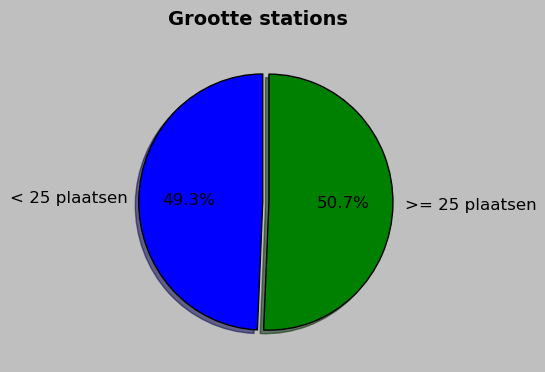

In [170]:
#Cirkeldiagram
import matplotlib.pyplot as plt
%matplotlib inline

total = velo_stations.count()
size = velo_stations.filter(lambda lp: lp.label == 1.0).count() # filteren op labels met 1.0
labels = ['< 25 plaatsen', '>= 25 plaatsen']
fracs = [total - size, size]
explode = (0, 0.05)

fig = plt.figure(figsize=(4, 4)) #vierkante vormen, 2 naast 1 bv 7, 14
fig.suptitle('Grootte stations', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.pie(fracs, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
pass #vermijd tekst boven grafiek : om proper te formatteren

In [185]:
#Periode selecteren
from IPython.display import HTML


input_form = """
    <div>
        <select id="months" onchange="filldays(this);" onfocus="this.selectedIndex = -1;">
            <option id="2014-01">Januari 2014</option>
            <option id="2014-04">April 2014</option>
            <option id="2014-07">Juli 2014</option>
            <option id="2014-10">Oktober 2014</option>
            <option id="2015-01">Januari 2015</option>
            <option id="2015-02">Februari 2015</option>
            <option id="2015-03">Maart 2015</option>
            <option id="2015-04">April 2015</option>
            <option id="2015-05">Mei 2015</option>
            <option id="2015-06">Juni 2015</option>
            <option id="2015-07">Juli 2015</option>
            <option id="2015-08">Augustus 2015</option>
            <option id="2015-09">September 2015</option>
            <option id="2015-10">Oktober 2015</option>
            <option id="2015-11">November 2015</option>
        </select>
        
        <select id="days">
        
        </select>
       <!-- <input type="date" max="2011-12-31" min="2014-01-01" value="2015-10-31" id="dateControlledByRange"  />-->
        <input type="range" step="1" max="23" min="0" value="12" id="hour" /> 
        <label id="selected"></label>
        <input type="submit" onclick="submit();" />
    </div>

"""

javascript = """

<script type="text/Javascript">

    var year, month, days, date;
    
    //select van dagen opvullen
    function filldays(d){
        date = d[d.selectedIndex].id;
        date = date.split("-");
        year = date[0]; // jaar is nodig voor een schrikkeljaar te bepalen
        month = date[1];
        
        days = new Date(year, month, 0).getDate();
        
        for(var i = 1; i <= days; i++){
            $('#days').append("<option value='" + i + "'>" + i + "</option>");
        }
    }
    
hour.oninput = function(){
     document.getElementById('selected').innerHTML =this.value + ' uur';
}
    
    //datum van javascript naar python krijgen
    function submit(){
        var monthyear = $('#months option:selected').attr("id");
        monthyear = monthyear.split("-");
        var month = monthyear[1];
        var year = monthyear[0];
        var day = $("#days option:selected").text();
        var hour = $("#hour").val();
        
        var var_name = "input_path";
        var var_value = "bike-usage-" + year + "-" + month + ".csv";
        var command = var_name + " = '" + var_value + "'";
        var kernel = IPython.notebook.kernel;
        kernel.execute(command);
        var_name = "day";
        var_value = day;
        var command = var_name + " = '" + var_value + "'";
        kernel.execute(command);
        var_name = "hour";
        var_value = hour;
        var command = var_name + " = '" + var_value + "'";
        kernel.execute(command);
        IPython.notebook.execute_cells_below();
    }
</script>
"""

HTML(input_form + javascript)

In [186]:
print input_path
print day
print hour


bike-usage-2015-01.csv
16
16


In [187]:
#gegevens verwerken
import os.path
from pyspark.mllib.regression import LabeledPoint
from time import mktime
from datetime import datetime

file_path = "";
day = int(day)
hour = int(hour)
filtered_file = None
if hour != None and day != None and input_path != None: #controleren of er input is van de form
    file_path = os.path.join(base_dir, input_path) # dir samenstellen, base_dir komt uit de eerste cel
    filtered_file = sc.textFile(file_path).filter(lambda l: 'BikeLocationID' not in l) # file filteren
    features_file = filtered_file.map(make_tuple) # tuples maken
    #hieronder zou er eigenlijk gefilterd moeten worden op dag en uur
    #iets zoals lambda l: l[1][3].day = day and l[1][3].hour = hour

    
    filtered_file = features_file.filter(lambda l: l[1][3][2] == day and l[1][3][3] == hour)    
    
station_ids = []
station_ids += velo_stations.map(lambda lp: (float(lp.features[4]))).collect()
vaps = {} #vertrek aankomst per station
for i in station_ids:#vaps met stations vullen + [0 arrivals, 0 retrieve]
    vaps[i] = [0, 0]
    
    
def depart_arrival_station(line):
    tup = []
    tup.append(line[1][1])
    #0.0 = terugzetten uitgezonderd werknemers
    #1.0 = fiets pakken
    #2.0 = al de rest en dus niet mee te rekenen
    tup.append(line[0])
    return tup

dep_arriv_tuples = filtered_file.map(depart_arrival_station)
filtered_dat = dep_arriv_tuples.filter(lambda l: l[1] != 2.0)

array_dat = filtered_dat.collect()
stationCounter = {}
popularStations = []
#array_dat = filtered_dat.groupByKey().partitionBy(2).map(lambda x: sorted(x[1].data))
# print 'break'
for i in array_dat:
    if i[1] == 0.0 and i[0] in vaps:
        vaps[i[0]][0] += 1
    elif i[0] in vaps:
        vaps[i[0]][1] += 1
        



    # color = {}
    # for key, value in vaps.iteritems():

    #     if value[0] > value[1]:
    #         color.update({key: 'groen'})
    #     elif value[0] < value[1]:
    #         color.update({key: 'rood'})
    #     else:
    #         color.update({key: 'blauw'})




In [188]:
#Hover over station nummers

%matplotlib inline
from mpl_toolkits.basemap import Basemap 
import matplotlib.pyplot as plt
import numpy as np
import string
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import mpld3
from mpld3 import utils, plugins
mpld3.enable_notebook()

class ClickInfo(plugins.PluginBase):
    """Plugin for getting info on click"""
    
    JAVASCRIPT = """
    mpld3.register_plugin("clickinfo", ClickInfo);
    ClickInfo.prototype = Object.create(mpld3.Plugin.prototype);
    ClickInfo.prototype.constructor = ClickInfo;
    ClickInfo.prototype.requiredProps = ["id", "ids"];
    function ClickInfo(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    ClickInfo.prototype.draw = function(){
        var obj = mpld3.get_element(this.props.id);
        ids = this.props.ids;
        obj.elements().on("mousedown",
                          function(d, i){
                            var selectedId = ids[i];
                            var_name = "selectedId";
                            var_value = selectedId;
                            var command = var_name + " = '" + var_value + "'";
                            var kernel = IPython.notebook.kernel;
                            kernel.execute(command);
                            IPython.notebook.execute_cells_below();
                            });
    }
    """
    def __init__(self, points, ids):
        self.points = points
        self.ids = ids
        suffix = None
        self.dict_ = {"type": "clickinfo",
                      "id": mpld3.utils.get_id(points, suffix),
                      "ids": ids}



        
center = [4.417978, 51.217098]
lon_range = 0.1
lat_range = 0.1
c1 = center[0] - (lon_range / 2) # 2 - left
c2 = center[1] - (lat_range / 3) # 3 - bottom
c3 = center[0] + (lon_range / 3) # 4 - right
c4 = center[1] + (lat_range / 5) # 3 - top


fig = plt.figure(figsize=(12, 12))


m = Basemap(llcrnrlon=c1,llcrnrlat=c2,urcrnrlon=c3,urcrnrlat=c4, epsg=5520)

m.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels=3000, verbose=True)

sizes = 30

x,y = m(lons, lats)



labels = []

for key, value in vaps.iteritems(): # itereer door dictionary
    for i in station_ids: # itereer door alle stations
        
        if key == i and value[0] > value[1]: # als station id gelijk is aan key, en aankomst > vertrek

            filtered = features_stations.filter(lambda l: l[1][5] == key) #kijk of het id gelijk is aan de key (= id)
            temp_station_array = filtered.collect()
            for s in temp_station_array: 
                x1, y1 = m(s[1][3], s[1][2])
                size = ((value[0] + value[1]) * 50)
                if size < 25:
                    m.scatter(x1, y1, s=25, alpha=0.5, color='g', label=station_ids)
                else:
                    m.scatter(x1, y1, s=size, alpha=0.5, color='g', label=station_ids)
                
        elif key == i and value[0] < value[1]: # als station id gelijk is aan key, en aankomst < vertrek
            filtered = features_stations.filter(lambda l: l[1][5] == key)
            temp_station_array = filtered.collect()
            for s in temp_station_array:
                x1, y1 = m(s[1][3], s[1][2])
                if size < 25:
                    m.scatter(x1, y1, s=25, alpha=0.5, color='r', label=station_ids)
                else:
                    m.scatter(x1, y1, s=size, alpha=0.5, color='r', label=station_ids)

        elif key == i and value[0] == value[1]: # als station id gelijk is aan key, en aankomst == vertrek
            filtered = features_stations.filter(lambda l: l[1][5] == key)
            temp_station_array = filtered.collect()
            for s in temp_station_array:
                x1, y1 = m(s[1][3], s[1][2])
                if size < 25:
                    m.scatter(x1, y1, s=25, alpha=0.5, color='b', label=station_ids)
                else:
                    m.scatter(x1, y1, s=size, alpha=0.5, color='b', label=station_ids)


    
for i in station_ids:
    labels.append('station {0:.0f}'.format(i))

points = m.scatter(x, y, s=500, alpha=0.0, color='g', label=station_ids)
m.scatter(x, y, s=500, alpha=0.0)
    
tooltip = mpld3.plugins.PointLabelTooltip(points, labels=labels, voffset=10, hoffset=10)
plugins.connect(fig, tooltip)
mpld3.plugins.connect(fig, ClickInfo(points, station_ids))
plt.title("Antwerpen - Velo")

pass #vermijd tekst boven grafiek : om proper te formatteren

#plt.show()
mpld3.display()

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=1595635.43747,5672836.68694,1601343.86667,5678880.7549&bboxSR=5520&imageSR=5520&size=3000,3176&dpi=96&format=png32&f=image


In [189]:
#Gegevens over geselecteerd station

try:
    selectedId = str(selectedId)
    selectedId.lstrip("0") # 0 verwijderen (bv. 050 -> 50)
    print "Station " + selectedId + " geselecteerd..."
    
    with open(file_name_velo_stations, 'rb') as f: # file openen 
        reader = csv.reader(f, delimiter=';')
        next(reader) # sla eerste lijn over
        for row in reader:
            if row[6].lstrip("0") == selectedId: # als o_id gelijk is aan geselecteerd id
                print 'Naam/Adres: ' + str(row[7]) # straatnaam
                for key, value in vaps.iteritems():
                    keyNoDecimal = '{0:g}'.format(float(key)) # kommagetal verwijderen (bv. 100.0 -> 100)
                    if keyNoDecimal == selectedId:
                        maxCapacity = float(row[8])
                        arrival = float(value[1])
                        departure = float(value[0])
                        remaining = maxCapacity - departure + arrival 
                        print '\nVeranderingen het voorbije uur: '
                        print 'Vertrokken: ' + str(departure)
                        print 'Aangekomen: ' + str(arrival)
                        print 'Capaciteit: ' + str(remaining)
                        print 'Maximum capaciteit: ' + str(row[8])
                        

            
except Exception:
    print 'Geen station geselecteerd.'

Station 52 geselecteerd...
Naam/Adres: Waaslandtunnel

Veranderingen het voorbije uur: 
Vertrokken: 0.0
Aangekomen: 10.0
Capaciteit: 50.0
Maximum capaciteit: 40


In [190]:
import matplotlib.pyplot as plt
import numpy as np
import mpld3

mpld3.enable_notebook()

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
N = 100

scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s=1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)
ax.grid(color='white', linestyle='solid')

ax.set_title("Scatter Plot (with tooltips!)", size=20)

labels = ['point {0}'.format(i + 1) for i in range(N)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

In [191]:
# #TESTMAP

# from mpl_toolkits.basemap import Basemap
# import matplotlib.pyplot as plt, mpld3
# import numpy as np
# import mpld3
# from mpld3 import plugins, utils

            

# mpld3.enable_notebook()


# # class ClickInfo(plugins.PluginBase):
# #     """Plugin for getting info on click"""
    
# #     JAVASCRIPT = """
# #     mpld3.register_plugin("clickinfo", ClickInfo);
# #     ClickInfo.prototype = Object.create(mpld3.Plugin.prototype);
# #     ClickInfo.prototype.constructor = ClickInfo;
# #     ClickInfo.prototype.requiredProps = ["id"];
# #     function ClickInfo(fig, props){
# #         mpld3.Plugin.call(this, fig, props);
# #     };
    
# #     ClickInfo.prototype.draw = function(){
# #         var obj = mpld3.get_element(this.props.id);
# #         obj.elements().on("mousedown",
# #                           function(d, i){
# #                           alert("clicked on points[" + i + "]");
# #                           console.log(d);
# #                           });
# #     }
# #     """
# #     def __init__(self, points):
# #         self.dict_ = {"type": "clickinfo",
# #                       "id": utils.get_id(points)}
 
# # center = [4.417978, 51.217098]
# # lon_range = 0.1
# # lat_range = 0.1
# # c1 = center[0] - (lon_range / 2) # 2 - left
# # c2 = center[1] - (lat_range / 3) # 3 - bottom
# # c3 = center[0] + (lon_range / 3) # 4 - right
# # c4 = center[1] + (lat_range / 5) # 3 - top
# # map = Basemap(llcrnrlon=c1,llcrnrlat=c2,urcrnrlon=c3,urcrnrlat=c4, epsg=5520)

# # #fig = plt.figure(figsize=(13, 13))
# # #fig, ax = plt.subplots(figsize=(12,12))

# # fig = plt.figure(figsize=(12,12))
# # fig.suptitle('Antwerpen : Fietsstations - Velo project', fontsize=15, fontweight='bold')
# # #fig.add_subplot(111)
# # # http://server.arcgisonline.com/arcgis/rest/services : ESRI_StreetMap_World_2D / ESRI_Imagery_World_2D
# # map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels=3000, verbose=True)

# # #fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))


# # map.plot(x, y, 'bo', markersize=15, color='g')
# # #points = ax.plot(x, y, 'bo', markersize=30, color='g')


# # #for label, xpt, ypt in zip(loc, x, y): 
# #     #plt.text(xpt - 60, ypt - 15, label, color='white') # add capacity labels / , fontweight='bold'   
# # #    tooltip = mpld3.plugins.PointLabelTooltip(points, labels=label)
# # #    mpld3.plugins.connect(fig, tooltip)

# # #fig, ax = plt.subplots()
# # #fig, ax = plt.subplots()
# # #!!!!!
# # # "ax" moet "map" zijn
# # #points = ax.scatter(x, y, s=500, alpha=0.3)
# # points = map.scatter(x, y, s=500, alpha=0.3)
# # #!!!!!

# # plugins.connect(fig, ClickInfo(points))
    
# # #plt.show()
# # #mpld3.display()

